![Banner](./img/AI_Special_Program_Banner.jpg)

# Exercises on text classification with Naive Bayes
---

<h2 style="color:blue">Task 1 - Theory</h2>

Read [Sebastian Raschka's article](http://sebastianraschka.com/Articles/2014_naive_bayes_1.html) about the Naive Bayes method and answer the following questions:
1. Why is *additional smoothing* helpful? What is this method called in our theory section?
2. What is meant by the term *stop word*?
3. Why is the *Multi-variate Bernoulli Naive Bayes Method* suitable for spam detection?

<h3 style="color:blue">1.1 - Why is <em>additional smoothing</em> helpful?</h3>

> Your solution

모델이 훈련 데이터에서 본 적이 없는 단어에 확률을 부여하기 위해 smoothing을 사용한다.Laplace Smoothing은 다항 분포에서 0이 아닌 확률을 가진 모든 데이터에 작은 값을 더해주는 방법이다. 이렇게 하면 모든 데이터 대해 0이 아닌 확률을 갖게 되고, 새로운 데이터에서 나타날 수 있는 확률이 0이 되는 것을 방지할 수 있다.

Additional smoothing, often applied using Laplace or Additive Smoothing in Naive Bayes models, is helpful to address the issue of zero probabilities. In text classification, certain words may not appear in all classes during training, leading to zero probabilities when calculating conditional probabilities. Smoothing helps avoid this problem by assigning a small, non-zero probability to unseen events. It makes the model more robust and prevents it from assigning zero probability to unseen features, improving its generalization to new data.

<h3 style="color:blue">1.2 - What is meant by the term <em>Stop Word</em>?</h3>

> Your solution

stop word는 is, a, the같이 별 의미 없는 단어이다.

A stop word refers to a common word that is often removed from text data during the preprocessing stage in natural language processing (NLP) tasks, such as text classification. Stop words are frequently occurring words (e.g., "the," "and," "is") that are generally considered to carry little semantic meaning and may not contribute much to the understanding of the text. Removing stop words can help reduce the dimensionality of the data and focus the model on more meaningful terms, improving efficiency and potentially enhancing the model's ability to capture important patterns.

<h3 style="color:blue">1.3 - Why is the <em>Multi-variate Bernoulli Naive Bayes Method</em> suitable for spam detection?</h3>

> Your solution

spam detection은 이진 분류이기 때문에 Multinomial Naive Bayes보다 Bernoulli Naive Bayes가 더 적합하다.

The Multivariate Bernoulli Naive Bayes method is suitable for spam detection because it models binary data, making it well-suited for situations where the presence or absence of features (words in the case of text classification) is important. In spam detection, the presence or absence of specific words or features in an email can be crucial for distinguishing between spam and non-spam messages. The Multivariate Bernoulli Naive Bayes model considers the presence or absence of each term independently, making it effective for binary feature representations. This approach is particularly relevant when using a binary term frequency representation (1 for the presence of a term, 0 for absence), making it a popular choice for spam filtering tasks.

<h2 style="color:blue">Task 2 - Fake news classification</h2>

<h3 style="color:blue">Task 2.1: Model creation</h3>

Perform a classification with the fake news data set `../data/fake_news` from [Kaggle](https://www.kaggle.com/c/fake-news/data). The aim is to generate a model that can be used to classify a news article as *reliable* or *unreliable*.

If you have access to Packt Publishing, you can find more information on the task and NLP methods in general in [Chapter 8](https://subscription.packtpub.com/book/data/9781789955750/8) of the book [Python Machine Learning](https://github.com/rasbt/python-machine-learning-book) by [Sebastian Raschka](https://sebastianraschka.com/blog/index.html). Although no Naive Bayes model is used there, the steps of data understanding and data preparation are very similar. However, the task is very closely oriented to the lecture content and can therefore be mastered very well even without access to Raschka's book.

#### Hints
* Read the data correctly as *pandas Dataframe* and set the index correctly.
* Think about which type of vectorization and which type of model could be suitable for the task.
* Divide the data into training and test data, analogous to the lecture material.
* Check the balance of the data. How many items are reliable, how many are unreliable? Can you ensure that this balance is the same in the training and test data?
* Always evaluate the result taking into account the null-accuracy. This is the accuracy achieved by a model that stubbornly assumes the most frequent feature. Is your model better or worse than null-accuracy?
* Evaluate your model using a confusion matrix.

#### Attributes of the data set:

* id: unique id for a news article
* title: the title of a news article
* author: author of the news article
* text: the text of the article; could be incomplete
* label: a label that marks the article as potentially unreliable
    - 0: reliable
    - 1: unreliable

#### Import of libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
import sklearn.naive_bayes as nb
import matplotlib.pyplot as plt

### Answer 2.1:

In [2]:
# Your solution
df = pd.read_csv("data/fake_news.csv")

In [3]:
df

,id,title,author,text,label
0,14649,See Real Voting System Rigged For Election The...,Activist Post,By Bev Harris A real-time demo of the most dev...,1
1,6473,Donald Trump Says He May Keep Parts of Obama H...,Reed Abelson,Just days after a national campaign in which h...,0
2,18736,Nunes ’Unmasking’ Report Vindicates Trump Clai...,Joel B. Pollak,House Intelligence Committee chair Rep. Devin ...,0
3,12347,Hillary’s Secret Is Out With What Camera Caugh...,Amanda Shea,Hillary’s Secret Is Out With What Camera Caugh...,1
4,17157,American Destroyer Fires Warning Shots at Iran...,Michael R. Gordon,WASHINGTON — In a vivid illustration of the...,0
...,...,...,...,...,...
4401,8227,James Comey’s Democrat Critics Now See Russian...,Aaron Klein,While former aides to President Obama and memb...,0
4402,5665,Trump promises $100 Billion to Black and Latin...,The European Union Times,\nDonald Trump is appealing to the black voter...,1
4403,16480,Newsticker (969),noreply@blogger.com (Der Postillon),+++ Hat's immer noch drauf: Alter Drehorgelspi...,1
4404,13094,Obama’s Brother Malik Supports Trump AND Wants...,Aaron Kesel,"We Are Change \nObama’s brother from Kenya, Ma...",1


In [4]:
y = df['label']

In [5]:
tf = text.TfidfVectorizer()  # tf-idf 
X_vec = tf.fit(df['text'])
X = X_vec.transform(df['text'])
# X = tf.fit_transform(df['Comment'])
print(f'In {X.shape[0]} texts are {X.shape[1]} different words')

In 4406 texts are 83026 different words


In [6]:
# not so easy to get a partial dict ... 
list(X_vec.vocabulary_.items())[:10]

[('by', 10867),
 ('bev', 8268),
 ('harris', 30673),
 ('real', 54816),
 ('time', 67535),
 ('demo', 18325),
 ('of', 47331),
 ('the', 67004),
 ('most', 44331),
 ('devastating', 19040)]

In [7]:
print("The feature matrix has ~{0:.2f}% not null entries.".format(
          100 * X.nnz / float(X.shape[0] * X.shape[1])))

The feature matrix has ~0.42% not null entries.


In [8]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=.2, random_state = 42)

In [9]:
bnb = ms.GridSearchCV(nb.BernoulliNB(), param_grid={'alpha':np.logspace(-2., 2., 50)})
bnb.fit(X_train, y_train)

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3...
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])})

In [10]:
print(f'The hit rate is around {round(100*bnb.score(X_test, y_test),2)}%')

The hit rate is around 82.88%


In [29]:
y.value_counts()

label
0    2533
1    1873
Name: count, dtype: int64

In [32]:
print('null accuracy:', y.value_counts()[0]/y.value_counts().sum())

null accuracy: 0.5748978665456196


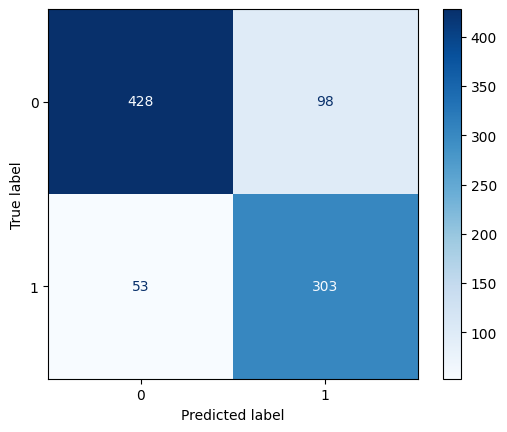

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = bnb.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=bnb.classes_, cmap='Blues')
plt.show()

<h3 style="color:blue">Task 2.2: Gain insights into the model</h3>

Do you trust your model? Find a way to display the words that influence the model the most in the classification.
#### Hints:
* At this point at the latest, you should think about the treatment of stop words.
* The conditional probabilities of the Naive Bayes model (*coefficients*) provide a good indication of the influence of words. Take a closer look at the attribute `feature_log_prob_` in the scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB).
* The `get_feature_names()` method of the Tfidf object is also helpful. This can be used to retrieve the vectorized words in plain text.
* Interpret your results!

### Answer 2.2:

In [ ]:
# Your solution 

In [16]:
fake_class_prob_sorted = bnb.best_estimator_.feature_log_prob_[1, :].argsort()

word_list_fake = np.take(X_vec.get_feature_names_out(), fake_class_prob_sorted[:-30:-1])

print(f'Words with fake connotations: \n {word_list_fake}')

Words with fake connotations: 
 ['the' 'to' 'of' 'in' 'and' 'is' 'on' 'that' 'for' 'it' 'by' 'this' 'with'
 'as' 'are' 'from' 'be' 'at' 'have' 'not' 'has' 'an' 'was' 'but' 'they'
 'who' 'or' 'all' 'their']


In [18]:
nfake_class_prob_sorted = bnb.best_estimator_.feature_log_prob_[0, :].argsort()

word_list_nfake = np.take(X_vec.get_feature_names_out(), nfake_class_prob_sorted[:-30:-1])

print(f'Words with fake connotations: \n {word_list_nfake}')

Words with fake connotations: 
 ['the' 'of' 'and' 'to' 'in' 'on' 'that' 'for' 'is' 'with' 'it' 'as' 'at'
 'by' 'was' 'from' 'an' 'be' 'have' 'not' 'said' 'has' 'this' 'but' 'he'
 'who' 'are' 'they' 'about']


stop words가 너무 많다
제거하면?

In [33]:
tf = text.TfidfVectorizer(stop_words="english")  # tf-idf 
X_vec = tf.fit(df['text'])
X = X_vec.transform(df['text'])
# X = tf.fit_transform(df['Comment'])
print(f'In {X.shape[0]} texts are {X.shape[1]} different words')

In 4406 texts are 82720 different words


In [34]:
# not so easy to get a partial dict ... 
list(X_vec.vocabulary_.items())[:10]

[('bev', 8219),
 ('harris', 30563),
 ('real', 54616),
 ('time', 67281),
 ('demo', 18261),
 ('devastating', 18974),
 ('election', 21967),
 ('theft', 66809),
 ('mechanism', 42070),
 ('context', 15339)]

In [35]:
print("The feature matrix has ~{0:.2f}% not null entries.".format(
          100 * X.nnz / float(X.shape[0] * X.shape[1])))

The feature matrix has ~0.33% not null entries.


In [36]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=.2, random_state = 42)

In [37]:
bnb = ms.GridSearchCV(nb.BernoulliNB(), param_grid={'alpha':np.logspace(-2., 2., 50)})
bnb.fit(X_train, y_train)

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3...
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])})

In [38]:
print(f'The hit rate is around {round(100*bnb.score(X_test, y_test),2)}%')

The hit rate is around 85.37%


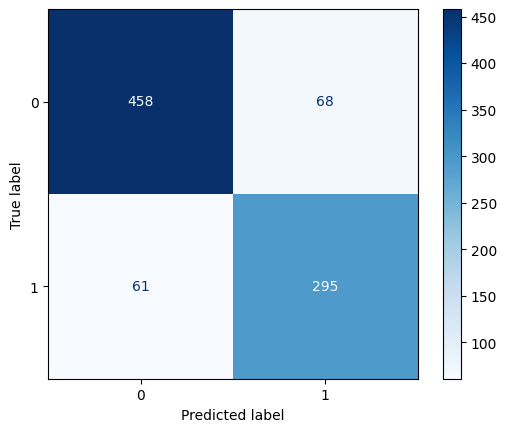

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = bnb.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=bnb.classes_, cmap='Blues')
plt.show()

In [40]:
fake_class_prob_sorted = bnb.best_estimator_.feature_log_prob_[1, :].argsort()

word_list_fake = np.take(X_vec.get_feature_names_out(), fake_class_prob_sorted[:-30:-1])

print(f'Words with fake connotations: \n {word_list_fake}')

Words with fake connotations: 
 ['2016' 'people' 'just' 'new' 'like' 'said' 'time' 'clinton' 'world'
 'hillary' 'years' 'trump' 'state' 'make' 'president' 'media' 'way'
 'government' 'year' 'right' 'election' 'american' 'know' 'news' 'don'
 'day' 'states' 'did' 'going']


<h3 style="color:blue"><b>Bonus task 2.3</b>: Authors instead of texts?</h3>

Perhaps fake news can be identified by the author alone? Create a model that uses the *authors as features* instead of the texts.
#### Hints:
* Why does this work particularly well/bad? Tip: Pay attention to the distribution of authors. Support your assumption with suitable data or visualizations!
* How useful do you think a model that only uses authors for classification is?

### Answer 2.3:

In [41]:
# Your solution
tf = text.TfidfVectorizer(stop_words="english")  # tf-idf 
X_vec = tf.fit(df['author'])
X = X_vec.transform(df['author'])
# X = tf.fit_transform(df['Comment'])
print(f'In {X.shape[0]} authors are {X.shape[1]} different words')

In 4406 authors are 2126 different words


In [42]:
# not so easy to get a partial dict ... 
list(X_vec.vocabulary_.items())[:10]

[('activist', 22),
 ('post', 1510),
 ('reed', 1578),
 ('abelson', 17),
 ('joel', 953),
 ('pollak', 1503),
 ('amanda', 78),
 ('shea', 1747),
 ('michael', 1269),
 ('gordon', 737)]

In [43]:
print("The feature matrix has ~{0:.2f}% not null entries.".format(
          100 * X.nnz / float(X.shape[0] * X.shape[1])))

The feature matrix has ~0.11% not null entries.


In [44]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=.2, random_state = 42)

In [46]:
bnb = ms.GridSearchCV(nb.BernoulliNB(), param_grid={'alpha':np.logspace(-2., 2., 50)})
bnb.fit(X_train, y_train)

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3...
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])})

In [47]:
print(f'The hit rate is around {round(100*bnb.score(X_test, y_test),2)}%')

The hit rate is around 93.2%


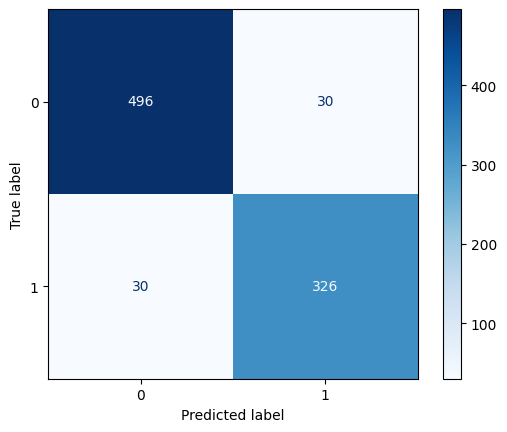

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = bnb.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=bnb.classes_, cmap='Blues')
plt.show()

In [49]:
fake_class_prob_sorted = bnb.best_estimator_.feature_log_prob_[1, :].argsort()

word_list_fake = np.take(X_vec.get_feature_names_out(), fake_class_prob_sorted[:-30:-1])

print(f'Words with fake connotations: \n {word_list_fake}')

Words with fake connotations: 
 ['com' 'noreply' 'blogger' 'admin' 'alex' 'lavine' 'eddy' 'author'
 'starkman' 'staff' 'activist' 'gillian' 'post' 'editor' 'ansary' 'david'
 'news' 'pakalert' 'times' 'european' 'union' 'jason' 'dr' 'michael'
 'paul' 'portnoy' 'sheik' 'howard' 'iron']


stop word 제거 안한 버전

In [19]:
# Your solution
tf = text.TfidfVectorizer()  # tf-idf 
X_vec = tf.fit(df['author'])
X = X_vec.transform(df['author'])
# X = tf.fit_transform(df['Comment'])
print(f'In {X.shape[0]} authors are {X.shape[1]} different words')

In 4406 authors are 2180 different words


In [20]:
# not so easy to get a partial dict ... 
list(X_vec.vocabulary_.items())[:10]

[('activist', 23),
 ('post', 1542),
 ('reed', 1611),
 ('abelson', 17),
 ('joel', 976),
 ('pollak', 1535),
 ('amanda', 80),
 ('shea', 1780),
 ('michael', 1293),
 ('gordon', 756)]

In [21]:
print("The feature matrix has ~{0:.2f}% not null entries.".format(
          100 * X.nnz / float(X.shape[0] * X.shape[1])))

The feature matrix has ~0.11% not null entries.


In [22]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=.2, random_state = 42)

In [23]:
bnb = ms.GridSearchCV(nb.BernoulliNB(), param_grid={'alpha':np.logspace(-2., 2., 50)})
bnb.fit(X_train, y_train)

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3...
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])})

In [24]:
print(f'The hit rate is around {round(100*bnb.score(X_test, y_test),2)}%')

The hit rate is around 93.31%


classification using text's hit rate was 82.88%

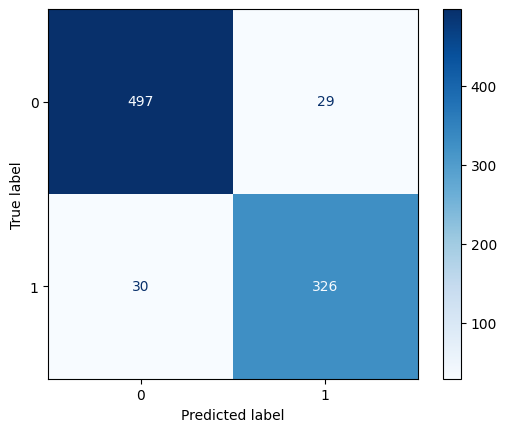

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

# 테스트 데이터에 대한 예측
y_pred = bnb.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=bnb.classes_, cmap='Blues')
plt.show()

In [26]:
fake_class_prob_sorted = bnb.best_estimator_.feature_log_prob_[1, :].argsort()

word_list_fake = np.take(X_vec.get_feature_names_out(), fake_class_prob_sorted[:-30:-1])

print(f'Words with fake connotations: \n {word_list_fake}')

Words with fake connotations: 
 ['com' 'the' 'blogger' 'noreply' 'admin' 'alex' 'lavine' 'eddy' 'author'
 'starkman' 'staff' 'activist' 'editor' 'post' 'ansary' 'gillian' 'david'
 'pakalert' 'news' 'union' 'jason' 'times' 'european' 'dr' 'portnoy'
 'sheik' 'howard' 'iron' 'michael']


In [27]:
nfake_class_prob_sorted = bnb.best_estimator_.feature_log_prob_[0, :].argsort()

word_list_nfake = np.take(X_vec.get_feature_names_out(), nfake_class_prob_sorted[:-30:-1])

print(f'Words with fake connotations: \n {word_list_nfake}')

Words with fake connotations: 
 ['and' 'michael' 'breitbart' 'john' 'charlie' 'pam' 'key' 'david'
 'haberman' 'ben' 'ian' 'maggie' 'hudson' 'jerome' 'daniel' 'eric'
 'richard' 'adam' 'warner' 'spiering' 'huston' 'todd' 'hayward' 'baker'
 'james' 'hanchett' 'alan' 'thomas' 'kew']
